<a href="https://colab.research.google.com/github/igorgcgv/Predi-o-Valor-Imovel-Boston/blob/main/Predi%C3%A7%C3%A3o_de_Pre%C3%A7os_de_Imov%C3%A9is_de_Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Preparação dos Dados

In [1]:
#Importando as Libs
import sklearn as sl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import warnings
import statsmodels.api as sm

warnings.filterwarnings("ignore")

In [2]:
#Carregando o dataset

data_ = '/content/HousingData.csv'
dataset_ = pd.read_csv(data_)
dataset_.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
#Shape

dataset_.shape

(506, 14)

In [4]:
#Verificando se há valores nulos

dataset_.isna().sum()


CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [5]:
# Calcula o percentual de valores ausentes
def func_calc_percentual_valores_ausentes(df):

    # Calcula o total de células no dataset
    totalCells = np.product(df.shape)

    # Conta o número de valores ausentes por coluna
    missingCount = df.isnull().sum()

    # Calcula o total de valores ausentes
    totalMissing = missingCount.sum()

    # Calcula o percentual de valores ausentes
    print("O dataset tem", round(((totalMissing/totalCells) * 100), 2), "%", "de valores ausentes.")

# Função que calcula o percentual de linhas com valores ausentes
def func_calc_percentual_valores_ausentes_linha(df):

    # Calcula o número total de linhas com valores ausentes
    missing_rows = sum([True for idx,row in df.iterrows() if any(row.isna())])

    # Calcula o número total de linhas
    total_rows = df.shape[0]

    # Calcula a porcentagem de linhas ausentes
    print(round(((missing_rows/total_rows) * 100), 2), "%", "das linhas no conjunto de dados contêm pelo menos um valor ausente.")

# Função para calcular valores ausentes por coluna
def func_calc_percentual_valores_ausentes_coluna(df):

    # Total de valores ausentes
    mis_val = df.isnull().sum()

    # Porcentagem de valores ausentes
    mis_val_percent = 100 * mis_val / len(df)

    # Tipo de dado das colunas com valores ausentes
    mis_val_dtype = df.dtypes

    # Cria uma tabela com os resultados
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

    # Renomear as colunas
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Valores Ausentes', 1 : '% de Valores Ausentes', 2: 'Dtype'})

    # Classifica a tabela por porcentagem de valores ausentes de forma decrescente e remove colunas sem valores faltantes
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,0] != 0].sort_values('% de Valores Ausentes', ascending = False).round(2)

    # Print
    print ("O dataset tem " + str(df.shape[1]) + " colunas.\n"
        "Encontrado: " + str(mis_val_table_ren_columns.shape[0]) + " colunas que têm valores ausentes.")

    if mis_val_table_ren_columns.shape[0] == 0:
        return

    # Retorna o dataframe com informações ausentes
    return mis_val_table_ren_columns



In [6]:
func_calc_percentual_valores_ausentes(dataset_)

O dataset tem 1.69 % de valores ausentes.


In [7]:
func_calc_percentual_valores_ausentes_linha(dataset_)

22.13 % das linhas no conjunto de dados contêm pelo menos um valor ausente.


In [8]:
func_calc_percentual_valores_ausentes_coluna(dataset_)

O dataset tem 14 colunas.
Encontrado: 6 colunas que têm valores ausentes.


,Valores Ausentes,% de Valores Ausentes,Dtype
CRIM,20,3.95,float64
ZN,20,3.95,float64
INDUS,20,3.95,float64
CHAS,20,3.95,float64
AGE,20,3.95,float64
LSTAT,20,3.95,float64


In [9]:
#Dropando os valores nulos

dataset_ = dataset_.dropna()

In [10]:
#Verificando se há valores nulos

dataset_.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

###Analise Descritivas dos Dados


In [11]:
# Descrição dos dados

dataset_.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
dataset_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     394 non-null    float64
 1   ZN       394 non-null    float64
 2   INDUS    394 non-null    float64
 3   CHAS     394 non-null    float64
 4   NOX      394 non-null    float64
 5   RM       394 non-null    float64
 6   AGE      394 non-null    float64
 7   DIS      394 non-null    float64
 8   RAD      394 non-null    int64  
 9   TAX      394 non-null    int64  
 10  PTRATIO  394 non-null    float64
 11  B        394 non-null    float64
 12  LSTAT    394 non-null    float64
 13  MEDV     394 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 46.2 KB


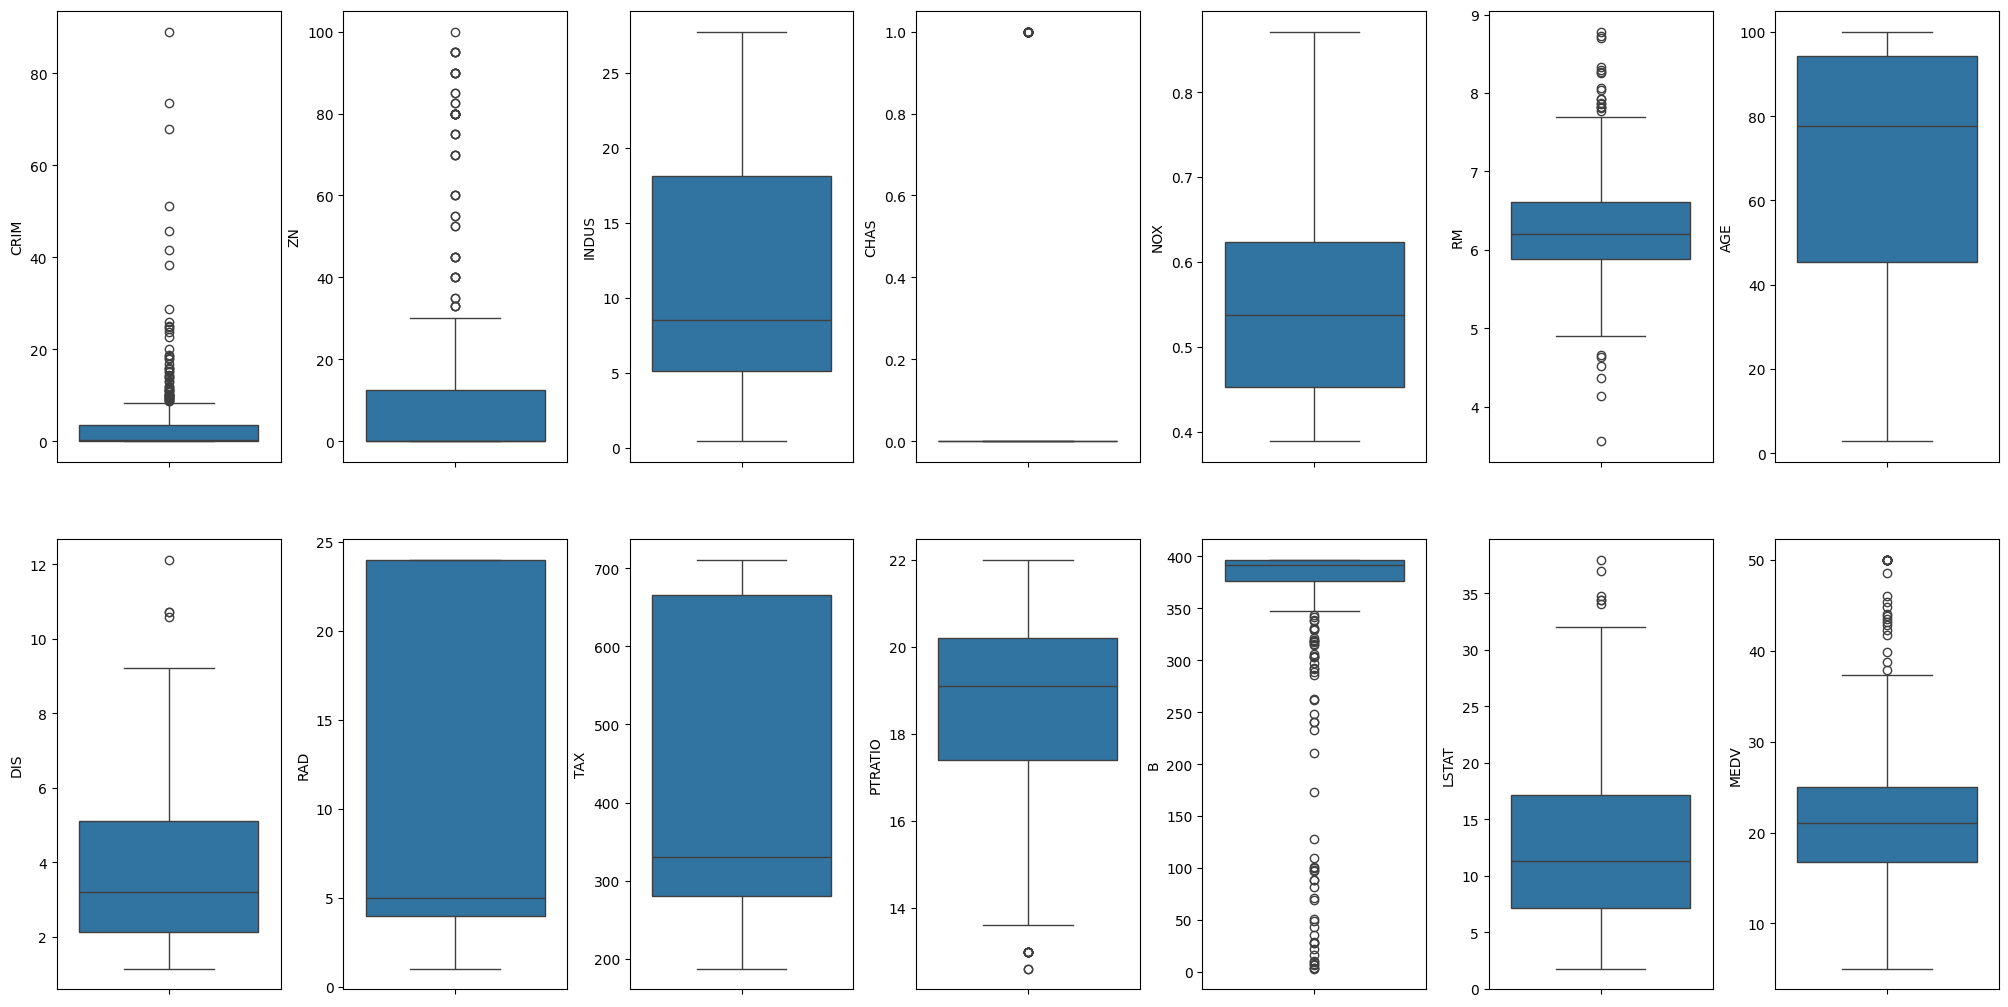

In [13]:
#Box-Plot das váriaveis


fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in dataset_.items():
    sns.boxplot(y=k, data=dataset_, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)



CRIM - A várivael possuí uma grande quantidade de outliers, e a concentração de seus valores estão entre  0 e 5;

ZN - A várivael possuí uma grande quantidade de outliers, e a concentração de seus valores estão entre  0 e 15;

INDUS - A várivael não possuí outliers, e a concentração de seus valores estão entre  5 e 18, onde a maioria de suas amostras estão concentrada ( cerca de 50%) entre 5 e 8;

CHAS - A váriavel é do tipo binário ( 0 ou 1);

NOX - A váriavel se assemelha a uma distribuição normal;

RM -  váriavel se assemelha a uma distribuição normal, porém possui muitos outliers, superior e inferior;

AGE - A váriavel se assemelha a uma distribuição normal;

DIS - A váriavel se assemelha a uma distribuição normal;

RAD - A váriavel possui uma grande concentração de valores ( cerca de 50%) entre 4 e 5;

TAX -  A váriavel possui uma grande concentração de valores ( cerca de 50%) entre 280 e 330;

PTRATIO - A váriavel se assemelha a uma distribuição normal, com alguns outliers;

B - A várivael possuí uma grande quantidade de outliers, e a concentração de seus valores estão entre  380 e 400;

LSTAT - A váriavel se assemelha a uma distribuição normal;

MEDV - É a nossa váriavel target , A váriavel se assemelha a uma distribuição normal com alguns outliers;

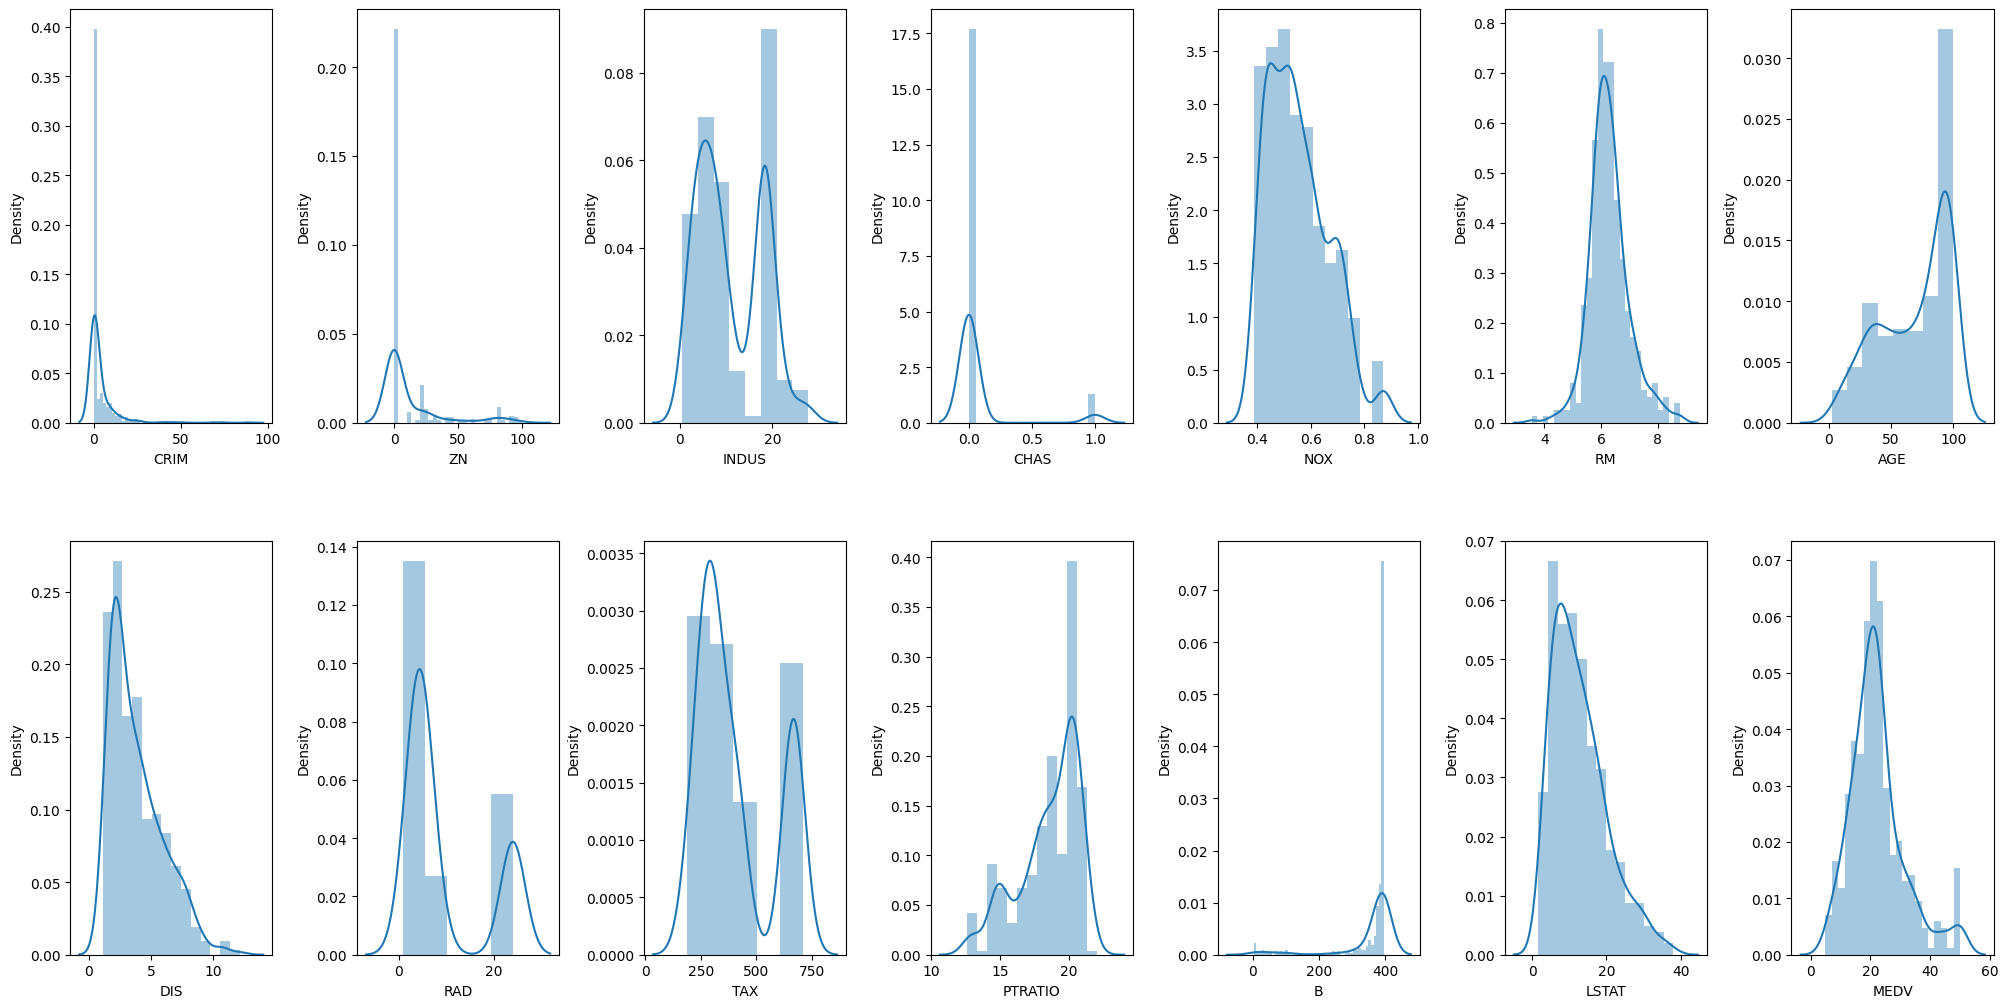

In [14]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in dataset_.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Podemos ver que as variavéis RAD , TAX são bimodais

<Axes: >

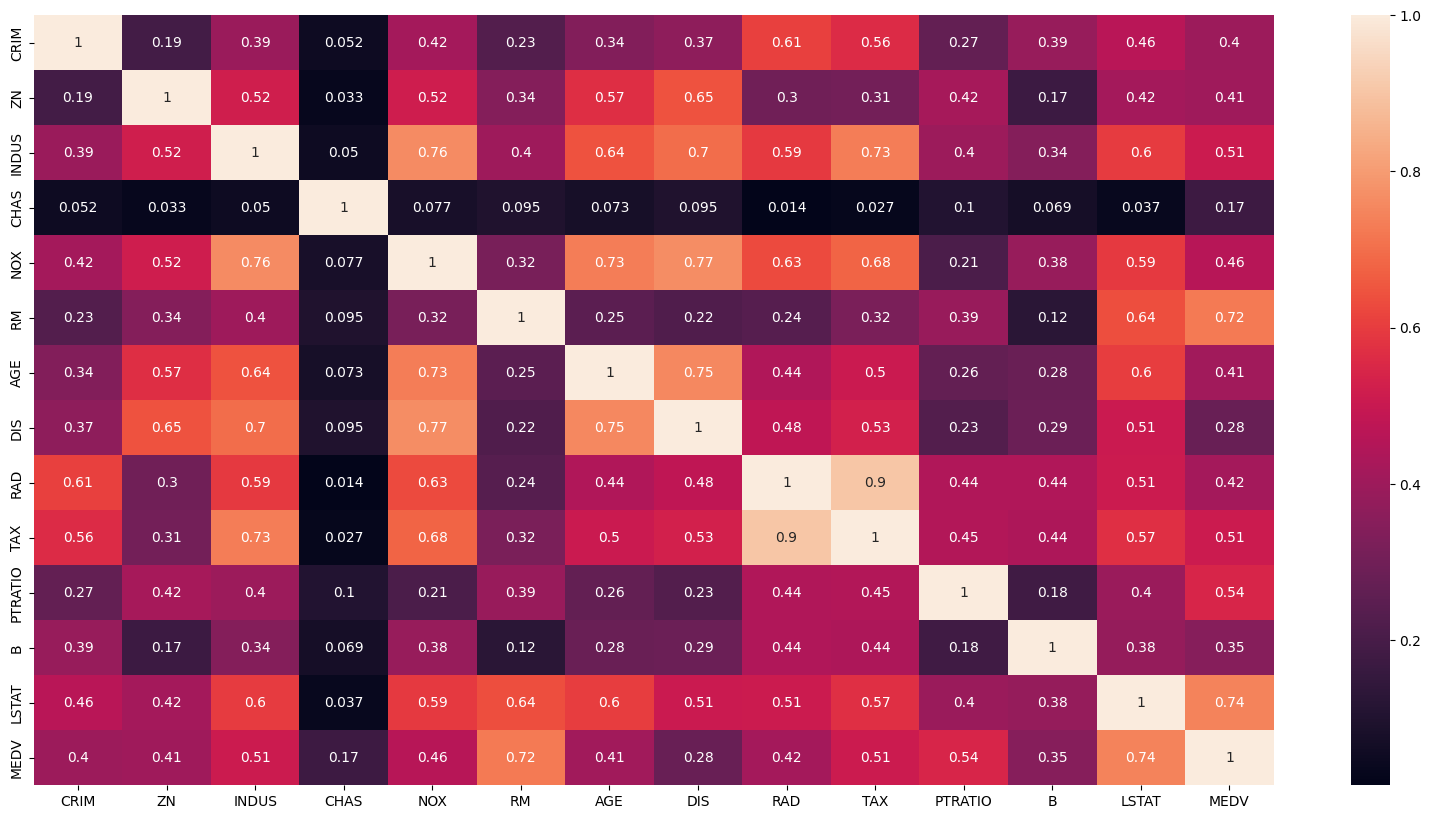

In [15]:
plt.figure(figsize=(20, 10))
sns.heatmap(dataset_.corr().abs(),  annot=True)

Na matriz de correlação, vemos que TAX e RAD são recursos altamente correlacionados. As colunas LSTAT, INDUS, RM, TAX, NOX, PTRAIO tem uma pontuação de correlação acima de 0,5 com MEDV, o que é uma boa indicação de uso como preditores.

In [16]:
#Função para tratar os Outliers

# Classe
class TrataOutlier:

    # Construtor
    def __init__(self, df: pd.DataFrame) -> None:
        self.df = df

    def count_outliers(self, Q1, Q3, IQR, columns):
        cut_off = IQR * 1.5
        temp_df = (self.df[columns] < (Q1 - cut_off)) | (self.df[columns] > (Q3 + cut_off))
        return [len(temp_df[temp_df[col] == True]) for col in temp_df]

    def calc_skew(self, columns=None):
        if columns == None:
            columns = self.df.columns
        return [self.df[col].skew() for col in columns]

    def percentage(self, list):
        return [str(round(((value/150001) * 100), 2)) + '%' for value in list]

    def remove_outliers(self, columns):
        for col in columns:
            Q1, Q3 = self.df[col].quantile(0.25), self.df[col].quantile(0.75)
            IQR = Q3 - Q1
            cut_off = IQR * 1.5
            lower, upper = Q1 - cut_off, Q3 + cut_off
            self.df = self.df.drop(self.df[self.df[col] > upper].index)
            self.df = self.df.drop(self.df[self.df[col] < lower].index)

    def replace_outliers_with_fences(self, columns):
        for col in columns:
            Q1, Q3 = self.df[col].quantile(0.25), self.df[col].quantile(0.75)
            IQR = Q3 - Q1
            cut_off = IQR * 1.5
            lower, upper = Q1 - cut_off, Q3 + cut_off

            self.df[col] = np.where(self.df[col] > upper, upper, self.df[col])
            self.df[col] = np.where(self.df[col] < lower, lower, self.df[col])

    def getOverview(self, columns) -> None:
        min = self.df[columns].min()
        Q1 = self.df[columns].quantile(0.25)
        median = self.df[columns].quantile(0.5)
        Q3 = self.df[columns].quantile(0.75)
        max = self.df[columns].max()
        IQR = Q3 - Q1
        skew = self.calc_skew(columns)
        outliers = self.count_outliers(Q1, Q3, IQR, columns)
        cut_off = IQR * 1.5
        lower, upper = Q1 - cut_off, Q3 + cut_off

        new_columns = ['Nome de Coluna', 'Min', 'Q1', 'Median', 'Q3', 'Max', 'IQR', 'Lower fence', 'Upper fence', 'Skew', 'Num_Outliers', 'Percent_Outliers' ]

        data = zip([column for column in self.df[columns]], min, Q1, median, Q3, max, IQR, lower, upper, skew, outliers, self.percentage(outliers))

        new_df = pd.DataFrame(data = data, columns = new_columns)

        new_df.set_index('Nome de Coluna', inplace = True)
        \
        return new_df.sort_values('Num_Outliers', ascending = False).transpose()

In [17]:
# Cria o objeto trata outlier
trata_outlier = TrataOutlier(dataset_)

In [18]:
# Lista de colunas float64
lista_colunas = dataset_.drop(columns = ['CHAS']).columns.tolist()
lista_colunas

['CRIM',
 'ZN',
 'INDUS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV']

In [19]:
# Visão geral dos outliers
trata_outlier.getOverview(lista_colunas)

Nome de Coluna,B,CRIM,ZN,MEDV,RM,PTRATIO,LSTAT,DIS,INDUS,NOX,AGE,RAD,TAX
Min,2.6,0.00632,0.0,5.0,3.561,12.6,1.73,1.1296,0.46,0.389,2.9,1.0,187.0
Q1,376.7075,0.081955,0.0,16.8,5.87925,17.4,7.125,2.1101,5.13,0.453,45.475,4.0,280.25
Median,392.19,0.26888,0.0,21.05,6.2015,19.1,11.3,3.1992,8.56,0.538,77.7,5.0,330.0
Q3,396.9,3.435973,12.5,25.0,6.6055,20.2,17.1175,5.1167,18.1,0.624,94.25,24.0,666.0
Max,396.9,88.9762,100.0,50.0,8.78,22.0,37.97,12.1265,27.74,0.871,100.0,24.0,711.0
IQR,20.1925,3.354018,12.5,8.2,0.72625,2.8,9.9925,3.0066,12.97,0.171,48.775,20.0,385.75
Lower fence,346.41875,-4.949071,-18.75,4.5,4.789875,13.2,-7.86375,-2.3998,-14.325,0.1965,-27.6875,-26.0,-298.375
Upper fence,427.18875,8.466999,31.25,37.3,7.694875,24.4,32.10625,9.6266,37.555,0.8805,167.4125,54.0,1244.625
Skew,-2.987695,5.256934,2.258275,1.065946,0.487558,-0.884475,0.942665,1.032625,0.358792,0.703377,-0.59488,1.050144,0.692876
Num_Outliers,58,54,50,26,23,12,6,4,0,0,0,0,0


In [20]:
# Replace dos outliers
trata_outlier.replace_outliers_with_fences(lista_colunas)

In [21]:
# Visão geral dos outliers
trata_outlier.getOverview(lista_colunas)

Nome de Coluna,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
Min,0.00632,0.0,0.46,0.389,4.789875,2.9,1.1296,1.0,187.0,13.2,346.41875,1.73,5.0
Q1,0.081955,0.0,5.13,0.453,5.87925,45.475,2.1101,4.0,280.25,17.4,376.7075,7.125,16.8
Median,0.26888,0.0,8.56,0.538,6.2015,77.7,3.1992,5.0,330.0,19.1,392.19,11.3,21.05
Q3,3.435973,12.5,18.1,0.624,6.6055,94.25,5.1167,24.0,666.0,20.2,396.9,17.1175,25.0
Max,8.466999,31.25,27.74,0.871,7.694875,100.0,9.6266,24.0,711.0,22.0,396.9,32.10625,37.3
IQR,3.354018,12.5,12.97,0.171,0.72625,48.775,3.0066,20.0,385.75,2.8,20.1925,9.9925,8.2
Lower fence,-4.949071,-18.75,-14.325,0.1965,4.789875,-27.6875,-2.3998,-26.0,-298.375,13.2,346.41875,-7.86375,4.5
Upper fence,8.466999,31.25,37.555,0.8805,7.694875,167.4125,9.6266,54.0,1244.625,24.4,427.18875,32.10625,37.3
Skew,1.283692,1.291711,0.358792,0.703377,0.318113,-0.59488,0.900682,1.050144,0.692876,-0.846316,-1.190329,0.834066,0.353913
Num_Outliers,0,0,0,0,0,0,0,0,0,0,0,0,0


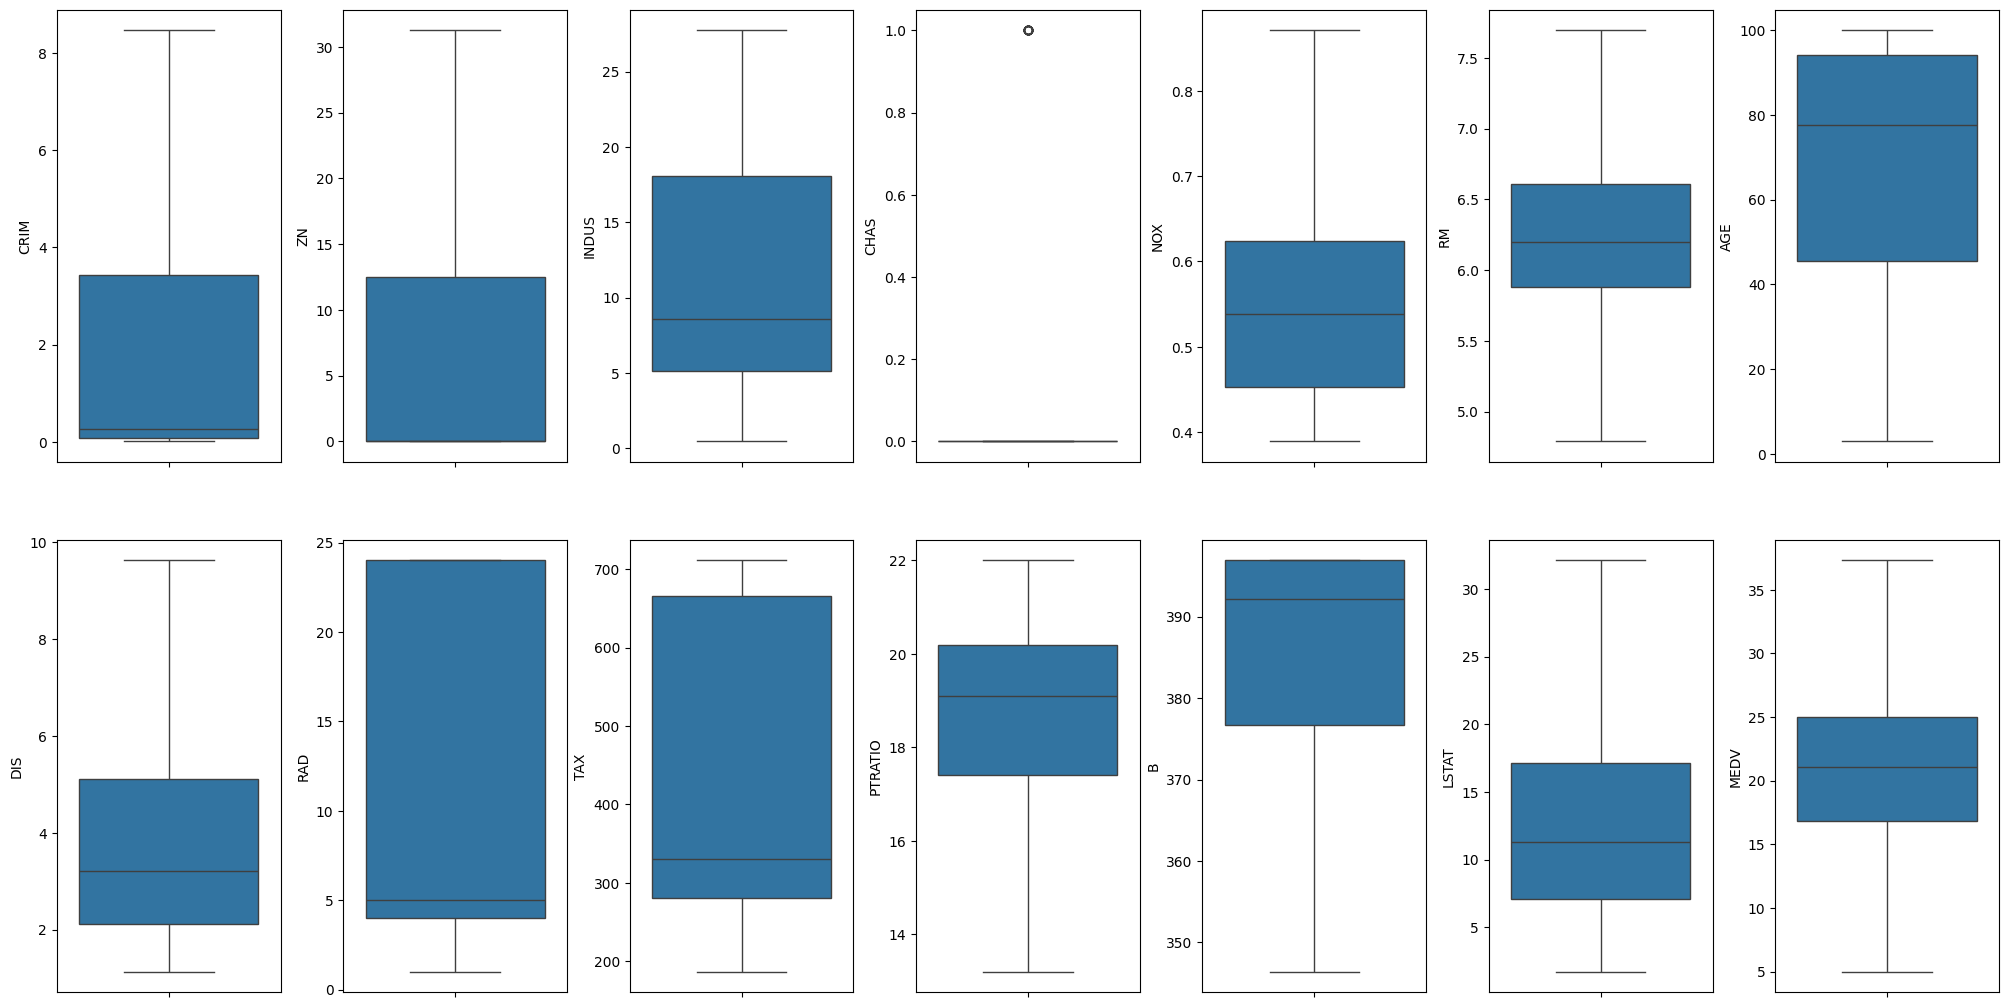

In [22]:
#Box-Plot das váriaveis


fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in dataset_.items():
    sns.boxplot(y=k, data=dataset_, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Como podemos ver, não há mais valores outliers. Todos foram tratados.

In [23]:
dataset_.shape

(394, 14)

In [24]:
dataset_.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     394 non-null    float64
 1   ZN       394 non-null    float64
 2   INDUS    394 non-null    float64
 3   CHAS     394 non-null    float64
 4   NOX      394 non-null    float64
 5   RM       394 non-null    float64
 6   AGE      394 non-null    float64
 7   DIS      394 non-null    float64
 8   RAD      394 non-null    float64
 9   TAX      394 non-null    float64
 10  PTRATIO  394 non-null    float64
 11  B        394 non-null    float64
 12  LSTAT    394 non-null    float64
 13  MEDV     394 non-null    float64
dtypes: float64(14)
memory usage: 46.2 KB


###Construção do Modelo Preditivo

In [25]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
array = dataset_.values
# Separar os dados em features (X) e target (y)
X = array [:,0:13] #Pega todas as linhas, da coluna 0 ate 13 (não inclusiva)
Y = array [:,13] #Pega todas as linhas, e a coluna de indice 13

In [26]:
#Padronização dos dados
from sklearn.preprocessing import StandardScaler

features_scaler = StandardScaler()
features_scaler.fit(X)
X = features_scaler.transform(X)

In [27]:
X

array([[-0.67232783,  0.94806239, -1.25962   , ..., -1.51462216,
         0.76962708, -1.08233293],
       [-0.66557829, -0.57381594, -0.56972405, ..., -0.34797935,
         0.76962708, -0.50051234],
       [-0.66558473, -0.57381594, -0.56972405, ..., -0.34797935,
         0.54675792, -1.21520061],
       ...,
       [-0.65980308, -0.57381594,  0.13466553, ...,  1.14532345,
         0.76962708, -0.50890399],
       [-0.65482212, -0.57381594,  0.13466553, ...,  1.14532345,
         0.76962708, -0.99002485],
       [-0.63912036, -0.57381594,  0.13466553, ...,  1.14532345,
         0.5807085 , -0.87254185]])

In [28]:


# Dividir os dados em amostras de treino e teste (30% Teste)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=7)

# Criar o modelo
modelo = LinearRegression()

# Treinar o modelo com os dados de treino

resultado = modelo.fit(X_train, Y_train)

# Fazer previsões com os dados de teste
Y_pred = modelo.predict(X_test) #Entao o Y_pred deve está mais proximo possivel dos valores do Y_teste

In [29]:
#Criando um DF com os valores de Y_Teste, Y_pred

# Criar um DataFrame com os arrays
df_pred = pd.DataFrame({'Y_teste': Y_test, 'Y_pred': Y_pred})
df_pred

,Y_teste,Y_pred
0,13.4,13.441984
1,17.2,16.207995
2,20.8,17.251556
3,21.4,17.605402
4,22.0,22.327378
...,...,...
114,37.3,37.085514
115,20.5,20.879795
116,23.3,26.490952
117,29.1,30.267102


<Axes: >

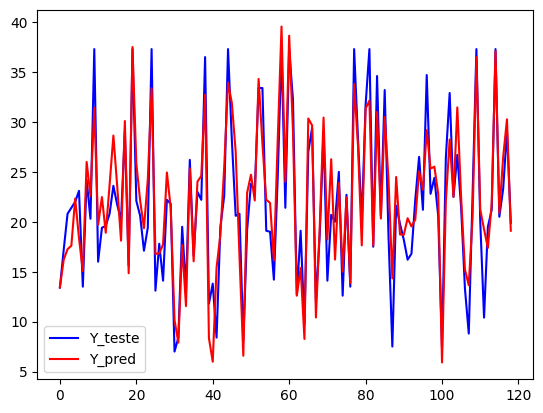

In [54]:
#Criando um grafico de linhas entre Y_Teste, Y_predict

sns.lineplot(data = df_pred, dashes = False, palette=['blue', 'red'] )

In [31]:
#Coeficientes da Regressao Linear

variaveis = pd.DataFrame(dataset_.columns, columns = ['X'])


coef = pd.DataFrame(modelo.coef_, columns = ['Coeficientes'])

df_merge = variaveis.merge(coef,left_index=True, right_index=True)
print(df_merge)

          X  Coeficientes
0      CRIM     -1.888786
1        ZN      0.788111
2     INDUS      0.289563
3      CHAS      0.682112
4       NOX     -1.850839
5        RM      2.071844
6       AGE     -0.484735
7       DIS     -2.559969
8       RAD      2.796862
9       TAX     -1.975954
10  PTRATIO     -1.522105
11        B      0.019570
12    LSTAT     -3.034094


In [32]:
# Intercept
intercept =modelo.intercept_

print(f"Intercept:{intercept}")

# Calcular a MAE do modelo
MAE = mean_absolute_error(Y_test, Y_pred)


print(f"MAE:{MAE}")

# Calcular a MSE do modelo
MSE = mean_squared_error(Y_test, Y_pred)


print(f"MSE:{MSE}")

# Calcular a R2 do modelo
R2 = r2_score(Y_test, Y_pred)


print(f"R2:{R2}")

Intercept:21.890786078631546
MAE:2.508570588452798
MSE:9.683279799659427
R2:0.8390463693865158


<Axes: ylabel='Count'>

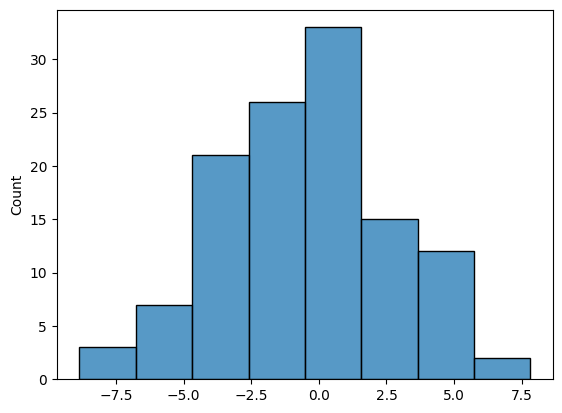

In [33]:
# Verificando a normalidade dos resíduos

# Absolut Erro

erro_absoluto = Y_test - Y_pred

#Plotando o Histograma dos Erros

sns.histplot(data = erro_absoluto , bins = 8)

In [34]:
from scipy.stats import shapiro



# Aplicar o teste de normalidade
stat, p = shapiro(erro_absoluto)

# Avaliar o resultado
alpha = 0.05
if p > alpha:
    print("Os dados parecem seguir uma distribuição normal (hipótese nula não rejeitada)")
else:
    print("Os dados não parecem seguir uma distribuição normal (hipótese nula rejeitada)")


Os dados parecem seguir uma distribuição normal (hipótese nula não rejeitada)


In [35]:
# Calcular os p-values usando o statsmodels
results = sm.OLS(Y, X).fit()
p_values = results.pvalues

# Exibir os p-values
print(p_values)







[0.61150933 0.76560215 0.97057749 0.65842887 0.53155222 0.20882616
 0.78500584 0.29717247 0.5171126  0.60314177 0.29264702 0.8767938
 0.15859625]


In [36]:
# Criar um DataFrame para visualização
pd.options.display.float_format = '{:.6f}'.format
variaveis = pd.DataFrame(dataset_.columns, columns = ['X'])


coef = pd.DataFrame(p_values, columns = ['Coeficientes'])

df_p_value = variaveis.merge(coef,left_index=True, right_index=True)
print(df_p_value)

          X  Coeficientes
0      CRIM      0.611509
1        ZN      0.765602
2     INDUS      0.970577
3      CHAS      0.658429
4       NOX      0.531552
5        RM      0.208826
6       AGE      0.785006
7       DIS      0.297172
8       RAD      0.517113
9       TAX      0.603142
10  PTRATIO      0.292647
11        B      0.876794
12    LSTAT      0.158596


Variaveis com p_value > 0,05 serão removidas do dataset, pois não possuem significancia estatistica para o modelo, ou seja , são indiferentes para a previsão

In [37]:
#Variaveis que serão dropadas
df_p_value.loc[df_p_value['Coeficientes'] > 0.05]

,X,Coeficientes
0,CRIM,0.611509
1,ZN,0.765602
2,INDUS,0.970577
3,CHAS,0.658429
4,NOX,0.531552
5,RM,0.208826
6,AGE,0.785006
7,DIS,0.297172
8,RAD,0.517113
9,TAX,0.603142


In [38]:
dataset_.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006320,18.000000,2.310000,0.000000,0.538000,6.575000,65.200000,4.090000,1.000000,296.000000,15.300000,396.900000,4.980000,24.000000
1,0.027310,0.000000,7.070000,0.000000,0.469000,6.421000,78.900000,4.967100,2.000000,242.000000,17.800000,396.900000,9.140000,21.600000
2,0.027290,0.000000,7.070000,0.000000,0.469000,7.185000,61.100000,4.967100,2.000000,242.000000,17.800000,392.830000,4.030000,34.700000
3,0.032370,0.000000,2.180000,0.000000,0.458000,6.998000,45.800000,6.062200,3.000000,222.000000,18.700000,394.630000,2.940000,33.400000
5,0.029850,0.000000,2.180000,0.000000,0.458000,6.430000,58.700000,6.062200,3.000000,222.000000,18.700000,394.120000,5.210000,28.700000


In [39]:
dataset_2 = dataset_.drop(columns =['ZN','INDUS','CHAS','NOX','AGE'])
dataset_2.head()

,CRIM,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006320,6.575000,4.090000,1.000000,296.000000,15.300000,396.900000,4.980000,24.000000
1,0.027310,6.421000,4.967100,2.000000,242.000000,17.800000,396.900000,9.140000,21.600000
2,0.027290,7.185000,4.967100,2.000000,242.000000,17.800000,392.830000,4.030000,34.700000
3,0.032370,6.998000,6.062200,3.000000,222.000000,18.700000,394.630000,2.940000,33.400000
5,0.029850,6.430000,6.062200,3.000000,222.000000,18.700000,394.120000,5.210000,28.700000


In [40]:
dataset_2.shape

(394, 9)

###Re-Construção do Modelo Preditivo


In [41]:
array = dataset_2.values
# Separar os dados em features (X) e target (y)
X_2 = array [:,0:8] #Pega todas as linhas, da coluna 0 ate 8 (não inclusiva)
Y_2 = array [:,8] #Pega todas as linhas, e a coluna de indice 8

In [42]:
#Padronização dos dados
from sklearn.preprocessing import StandardScaler

features_scaler = StandardScaler()
features_scaler.fit(X_2)
X = features_scaler.transform(X_2)

In [43]:
# Dividir os dados em amostras de treino e teste (30% Teste)
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X_2, Y_2, test_size=0.30, random_state=7)

# Criar o modelo
modelo = LinearRegression()

# Treinar o modelo com os dados de treino

resultado = modelo.fit(X_train_2, Y_train_2)

# Fazer previsões com os dados de teste
Y_pred_2 = modelo.predict(X_test_2) #Entao o Y_pred deve está mais proximo possivel dos valores do Y_teste

In [44]:
#Criando um DF com os valores de Y_Teste, Y_pred

# Criar um DataFrame com os arrays
df_pred_2 = pd.DataFrame({'Y_teste': Y_test_2, 'Y_pred': Y_pred_2})
df_pred_2

,Y_teste,Y_pred
0,13.400000,14.364326
1,17.200000,17.920056
2,20.800000,19.851461
3,21.400000,18.454377
4,22.000000,21.621201
...,...,...
114,37.300000,35.378447
115,20.500000,20.331306
116,23.300000,23.654998
117,29.100000,28.289822


<Axes: >

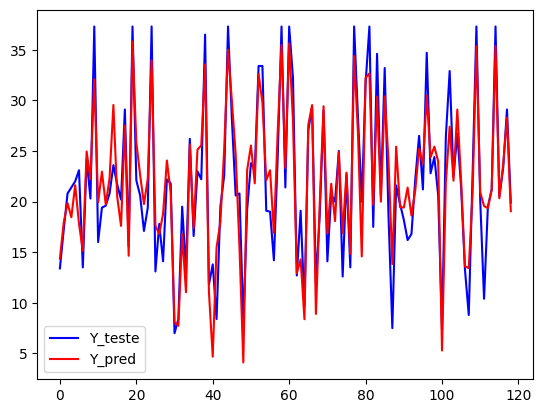

In [55]:
#Criando um grafico de linhas entre Y_Teste, Y_predict

sns.lineplot(data = df_pred_2, dashes = False, palette=['blue', 'red'] )

In [46]:
#Coeficientes da Regressao Linear

variaveis = pd.DataFrame(dataset_2.columns, columns = ['X'])


coef = pd.DataFrame(modelo.coef_, columns = ['Coeficientes'])

df_merge = variaveis.merge(coef,left_index=True, right_index=True)
print(df_merge)

         X  Coeficientes
0     CRIM     -0.654242
1       RM      3.559055
2      DIS     -0.496664
3      RAD      0.334024
4      TAX     -0.013376
5  PTRATIO     -0.695976
6        B      0.013513
7    LSTAT     -0.488417


A função de predição do modelo ficaria da seguinte forma:

Y_pred = 19-0,65(CRIM)+3,55(RM)-0,49(DIS)+0,33(RAD)-0,01(TAX)-0,69(PTRATIO)+0,01(B)-0,48(LSTAT)

In [47]:
# Intercept
intercept =modelo.intercept_

print(f"Intercept:{intercept}")

# Calcular a MAE do modelo
MAE = mean_absolute_error(Y_test_2, Y_pred_2)


print(f"MAE:{MAE}")

# Calcular a MSE do modelo
MSE = mean_squared_error(Y_test_2, Y_pred_2)


print(f"MSE:{MSE}")

# Calcular a R2 do modelo
R2 = r2_score(Y_test_2, Y_pred_2)


print(f"R2:{R2}")

Intercept:19.001022186655593
MAE:2.4024924953673192
MSE:9.238467818051832
R2:0.8464399493368377


R2 = 84,64% da variação do preço do imovél é compreendido com esse modelo, os 15 % não compreendidos consta nos resíduos.

In [48]:
# Calcular os p-values usando o statsmodels
results = sm.OLS(Y_2, X_2).fit()
p_values = results.pvalues

# Exibir os p-values
print(p_values)




[6.93980349e-04 5.03365672e-32 1.83576580e-04 6.37774829e-05
 4.28302787e-05 1.13371596e-11 1.18021971e-08 3.18665120e-21]


In [49]:
# Criar um DataFrame para visualização
pd.options.display.float_format = '{:.6f}'.format
variaveis = pd.DataFrame(dataset_2.columns, columns = ['X'])


coef = pd.DataFrame(p_values, columns = ['p_values'])

df_p_value = variaveis.merge(coef,left_index=True, right_index=True)
print(df_p_value)

         X  p_values
0     CRIM  0.000694
1       RM  0.000000
2      DIS  0.000184
3      RAD  0.000064
4      TAX  0.000043
5  PTRATIO  0.000000
6        B  0.000000
7    LSTAT  0.000000


Todas as variaveis possuem valores de p-value menor que 0.05

<Axes: ylabel='Count'>

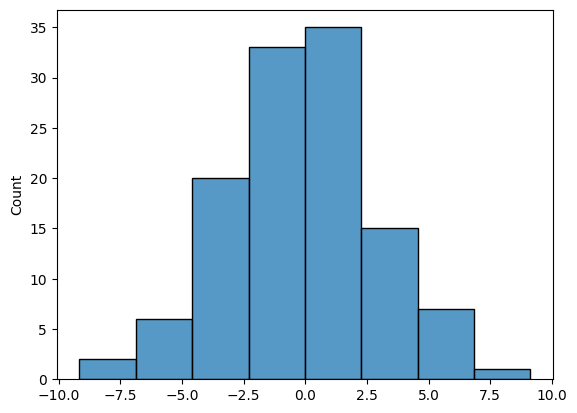

In [50]:
# Verificando a normalidade dos resíduos

# Absolut Erro

erro_absoluto = Y_test_2 - Y_pred_2

#Plotando o Histograma dos Erros

sns.histplot(data = erro_absoluto , bins = 8)

In [51]:
from scipy.stats import shapiro



# Aplicar o teste de normalidade
stat, p = shapiro(erro_absoluto)

# Avaliar o resultado
alpha = 0.05
if p > alpha:
    print("Os dados parecem seguir uma distribuição normal (hipótese nula não rejeitada)")
else:
    print("Os dados não parecem seguir uma distribuição normal (hipótese nula rejeitada)")


Os dados parecem seguir uma distribuição normal (hipótese nula não rejeitada)
